In [56]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import datetime as datetime
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import ModelCheckpoint
from sklearn.neighbors import KNeighborsRegressor

In [93]:
df = pd.read_csv('dataset/pp2020.csv') 

In [94]:
#Print columns name and dataset shape 
print("Columns = {}".format(df.columns))
print("Shape = {}".format(df.shape))
df.head(2)

Columns = Index(['{5BBE9CB3-6332-4EB0-9CD3-8737CEA4A65A}', '42000', '1995-12-21 00:00',
       'NE4 9DN', 'S', 'N', 'F', '8', 'Unnamed: 8', 'MATFEN PLACE', 'FENHAM',
       'NEWCASTLE UPON TYNE', 'NEWCASTLE UPON TYNE.1', 'TYNE AND WEAR', 'A',
       'A.1'],
      dtype='object')
Shape = (25231355, 16)


,{5BBE9CB3-6332-4EB0-9CD3-8737CEA4A65A},42000,1995-12-21 00:00,NE4 9DN,S,N,F,8,Unnamed: 8,MATFEN PLACE,FENHAM,NEWCASTLE UPON TYNE,NEWCASTLE UPON TYNE.1,TYNE AND WEAR,A,A.1
0,{20E2441A-0F16-49AB-97D4-8737E62A5D93},95000,1995-03-03 00:00,RM16 4UR,S,N,F,30,NaN,HEATH ROAD,GRAYS,GRAYS,THURROCK,THURROCK,A,A
1,{D893EE64-4464-44B5-B01B-8E62403ED83C},74950,1995-10-03 00:00,CW10 9ES,D,Y,F,15,NaN,SHROPSHIRE CLOSE,MIDDLEWICH,MIDDLEWICH,CONGLETON,CHESHIRE,A,A


In [95]:
#Dataset Preprocessing
'''The following cells contains code to preprocess the dataset in order to make it clear
and easy to access and work on for the purpose of our project'''

'The following cells contains code to preprocess the dataset in order to make it clear\nand easy to access and work on for the purpose of our project'

In [97]:
#Name all the columns
df.columns = ['ID', 'Price', 'Date_Sold', 'Post_Code', 'Property_Type', 'Old/New', 'Duration', 'PAON', 'SAON','Street','Locality','Town/City','District','County', 'PPD','Record_Status']
df.head(20)

,ID,Price,Date_Sold,Post_Code,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD,Record_Status
0,{20E2441A-0F16-49AB-97D4-8737E62A5D93},95000,1995-03-03 00:00,RM16 4UR,S,N,F,30,NaN,HEATH ROAD,GRAYS,GRAYS,THURROCK,THURROCK,A,A
1,{D893EE64-4464-44B5-B01B-8E62403ED83C},74950,1995-10-03 00:00,CW10 9ES,D,Y,F,15,NaN,SHROPSHIRE CLOSE,MIDDLEWICH,MIDDLEWICH,CONGLETON,CHESHIRE,A,A
2,{F9F753A8-E56A-4ECC-9927-8E626A471A92},43500,1995-11-14 00:00,TS23 3LA,S,N,F,19,NaN,SLEDMERE CLOSE,BILLINGHAM,BILLINGHAM,STOCKTON-ON-TEES,STOCKTON-ON-TEES,A,A
3,{E166398A-A19E-470E-BB5A-83B4C254CF6D},63000,1995-09-08 00:00,CA25 5QH,S,N,F,8,NaN,CROSSINGS CLOSE,CLEATOR MOOR,CLEATOR MOOR,COPELAND,CUMBRIA,A,A
4,{A9A3C463-3CA0-4D71-8CF9-83B4D0536EEA},29995,1995-05-12 00:00,PE14 8JF,S,N,F,114,NaN,SMEETH ROAD,ST JOHNS FEN END,WISBECH,KING'S LYNN AND WEST NORFOLK,NORFOLK,A,A
5,{8DE57D57-DDC3-4993-8C33-83B4E5BAA543},105000,1995-11-30 00:00,S6 6TG,D,N,F,70,NaN,WOODSTOCK ROAD,LOXLEY,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A
6,{568DE11A-432B-4DA3-B9A4-83B4EC4BD127},121250,1995-05-19 00:00,N12 8LR,F,N,L,CAVENDISH HOUSE,FLAT 20,WOODSIDE GRANGE ROAD,LONDON,LONDON,BARNET,GREATER LONDON,A,A
7,{F7A5CAE4-BDD3-4911-897C-8AC393B97281},43000,1995-12-01 00:00,LA6 3DQ,T,N,F,90,NaN,NEW VILLAGE,INGLETON,CARNFORTH,CRAVEN,NORTH YORKSHIRE,A,A
8,{DED4E551-6B96-40FB-98E9-8AC3B9071356},128500,1995-03-01 00:00,SW18 5DH,T,N,F,149,NaN,TRENTHAM STREET,LONDON,LONDON,WANDSWORTH,GREATER LONDON,A,A
9,{84CE6A8C-3D0F-47F8-8442-8E62807A726D},33000,1995-11-03 00:00,CV4 9LS,S,N,F,55,NaN,ALDRICH AVENUE,TILE HILL,COVENTRY,COVENTRY,WEST MIDLANDS,A,A


In [64]:
#Change data types
df['Price'] = pd.to_numeric(df['Price']) #convert price into type float
df['Date_Sold'] = pd.to_datetime(df['Date_Sold'], format='%Y-%m-%d') #convert to type datetime
df.dtypes

ID                       object
Price                     int64
Date_Sold        datetime64[ns]
Post_Code                object
Property_Type            object
Old/New                  object
Duration                 object
PAON                     object
SAON                     object
Street                   object
Locality                 object
Town/City                object
District                 object
County                   object
PPD                      object
Record_Status            object
dtype: object

In [65]:
#Extract only properties in London
london_houses = df.loc[df['Town/City']=='LONDON']
london_houses.shape

(1958445, 16)

In [66]:
#Check for missing values in the dataset
null_values = pd.DataFrame(london_houses.isnull().sum().sort_values(ascending=False)[:10])
null_values.index.name = 'Feature'
null_values.columns = ['Number of Null Values']
null_values

,Number of Null Values
Feature,
SAON,1136100
Locality,994574
Post_Code,4374
Street,1850
PAON,21
Record_Status,0
PPD,0
County,0
District,0


In [67]:
#Drop Columns 
london_houses = london_houses.drop(columns=['SAON', 'Locality','Post_Code','Street','PAON', 'Record_Status','Town/City', 'County'])
#Drop Rows with Property_Type == 'Others'
london_houses = london_houses[london_houses.Property_Type != 'O']
#Drop Rows with Duration == 'Undefined'
london_houses = london_houses[london_houses.Duration != 'U']

In [68]:
#Remove Duplicate Rows (if they exists)
print('Shape before removing duplicates: {}'.format(london_houses.shape))
london_houses.drop_duplicates(keep=False,inplace=True)
print('Shape after removing duplicates: {}'.format(london_houses.shape))

Shape before removing duplicates: (1932621, 8)
Shape after removing duplicates: (1932621, 8)


In [69]:
#Add month and year as column
london_houses['Year'],london_houses['Month'] = london_houses.Date_Sold.dt.year, london_houses.Date_Sold.dt.month
london_houses.head(2)

,ID,Price,Date_Sold,Property_Type,Old/New,Duration,District,PPD,Year,Month
6,{568DE11A-432B-4DA3-B9A4-83B4EC4BD127},121250,1995-05-19,F,N,L,BARNET,A,1995,5
8,{DED4E551-6B96-40FB-98E9-8AC3B9071356},128500,1995-03-01,T,N,F,WANDSWORTH,A,1995,3


In [70]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#Basic Statistics for each feature in the Dataset
for i in london_houses.columns:
    print("--------------------------------------------------")
    print("Statistics Information of the feature : {0}".format(i))
    print(london_houses[i].describe())
    print("--------------------------------------------------\n")

--------------------------------------------------
Statistics Information of the feature : ID
count                                    1932621
unique                                   1932621
top       {3E01A932-68A9-48F7-AB0B-6C83F30E28EE}
freq                                           1
Name: ID, dtype: object
--------------------------------------------------

--------------------------------------------------
Statistics Information of the feature : Price
count     1932621.00
mean       381456.49
std        610167.01
min             1.00
25%        148000.00
50%        249995.00
75%        430000.00
max     160000000.00
Name: Price, dtype: float64
--------------------------------------------------

--------------------------------------------------
Statistics Information of the feature : Date_Sold
count                 1932621
unique                   8591
top       2016-03-31 00:00:00
freq                     3034
first     1995-01-01 00:00:00
last      2020-03-19 00:00:00
Name: Da

Text(0.5, 1.0, 'Price Histogram')

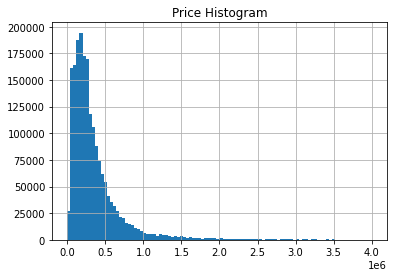

In [71]:
#Plot Distribution of the feature 'Price'. 
#High number of bins is required due to the high nuymber of extreme values
london_houses['Price'].hist(range=[0,4000000], bins = 100)
plt.title('Price Histogram')

In [72]:
print("Skew of feature 'Price':", london_houses['Price'].skew())
log_price = np.log(london_houses['Price'])
print("Skew of log Price: ", (log_price.skew()))

Skew of feature 'Price': 29.163078181907338
Skew of log Price:  0.06183889091930049


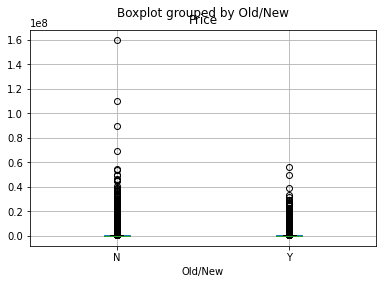

In [73]:
#Box plot grouped by Old/New
london_houses.boxplot(column='Price', by = 'Old/New')

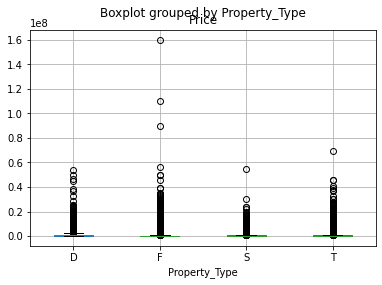

In [74]:
#Box plot grouped by Property_Type
london_houses = london_houses[london_houses.Property_Type != 'O']
london_houses.boxplot(column = 'Price', by = 'Property_Type')

(0.0, 200000000.0)

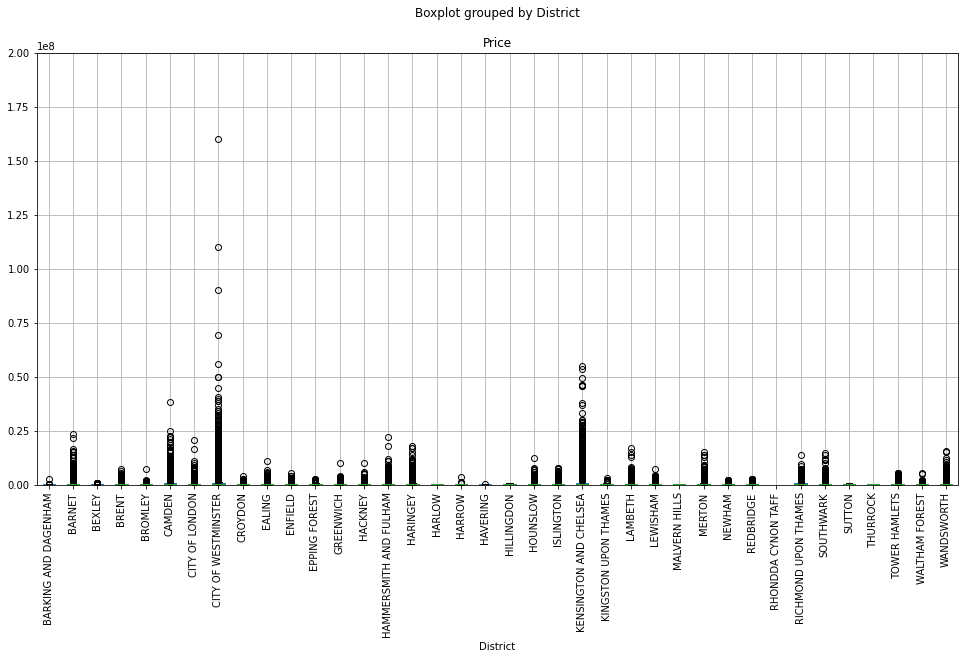

In [75]:
#Box plot grouped by District
axes = london_houses.boxplot(column = 'Price', by ='District', figsize = (16,8))
plt.xticks(rotation=90)
axes.set_ylim([0,200000000])

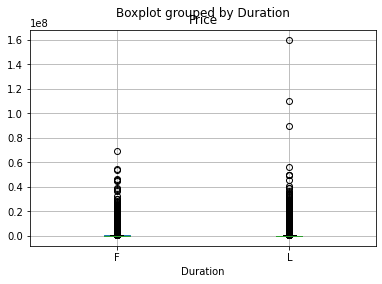

In [76]:
#Box plot grouped by Duration
london_houses.boxplot(column = 'Price', by = 'Duration')

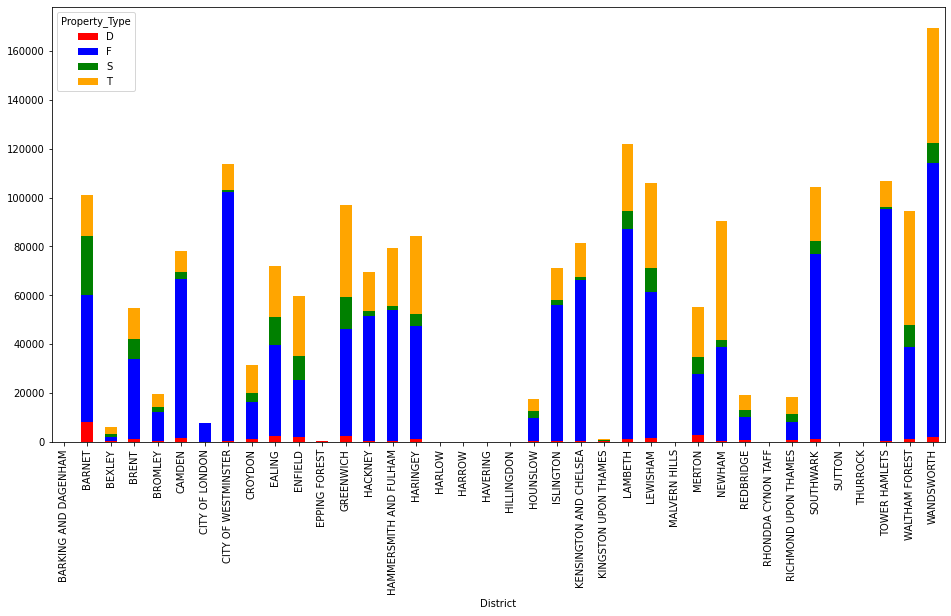

In [77]:
#Bar plot of the no. and types of houses sold in each borough
temp1 = pd.crosstab(london_houses['District'], london_houses['Property_Type'])
temp1.plot(kind = 'bar', stacked = True, color =['red','blue','green','orange','grey'], grid = False, figsize = (16,8))

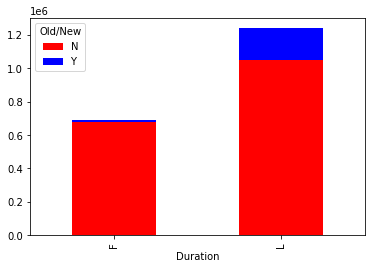

In [78]:
#Bar plot of properties By tenure
temp2 = pd.crosstab(london_houses['Duration'], london_houses['Old/New'])
temp2.plot(kind='bar', stacked = True, color =['red','blue'], grid = False)

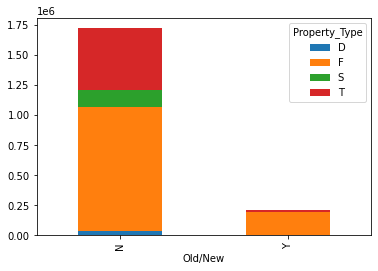

In [79]:
#BAr plot of properties by their age (Old/New)
temp3 = pd.crosstab(london_houses['Old/New'], london_houses['Property_Type'])
temp3.plot(kind='bar', stacked=True, grid=False)

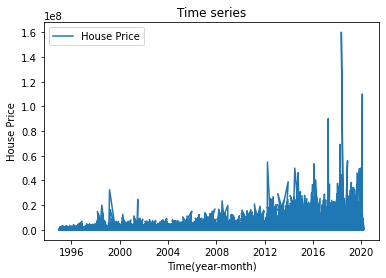

In [80]:
#Time series of prices over time
london_houses.index = london_houses['Date_Sold']
df = london_houses.loc[:,['Price']]
ts = df['Price']
plt.plot(ts, label='House Price')
plt.title('Time series')
plt.xlabel('Time(year-month)')
plt.ylabel('House Price')
plt.legend(loc = 'best')
plt.show()

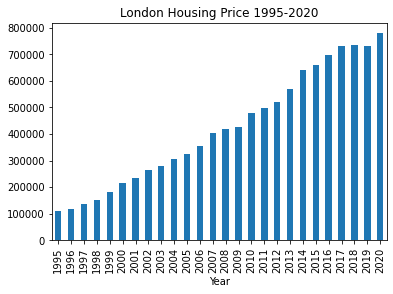

In [81]:
#Bar Plot of prices over time (Year)
london_houses.groupby('Year')['Price'].mean().plot.bar(title = 'London Housing Price 1995-2020')

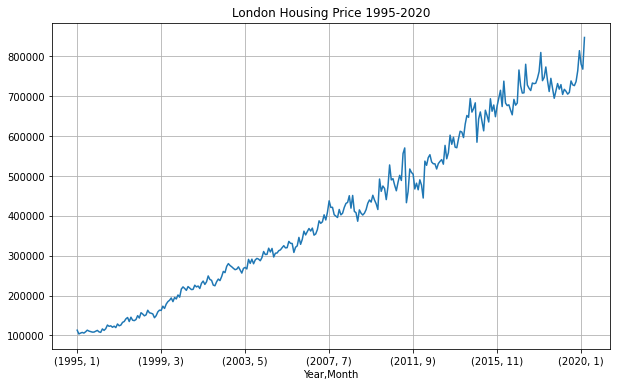

In [82]:
#Bar Plot of prices over time (Year/Months)
london_houses.groupby(['Year','Month'])['Price'].mean().plot(title = 'London Housing Price 1995-2020', figsize=(10,6), grid='on')

In [83]:
#Preperae testing and validation data for the models
X = london_houses.drop(['Date_Sold','Price','ID', 'Duration', 'PPD','District','Old/New'], axis=1)
y = np.log(london_houses.Price)
X = pd.get_dummies(X) #encode categorical data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X.head(2)

,Year,Month,Property_Type_D,Property_Type_F,Property_Type_S,Property_Type_T
Date_Sold,,,,,,
1995-05-19,1995,5,0,1,0,0
1995-03-01,1995,3,0,0,0,1


In [ ]:
# !!!! NOTE : THE KNN MODELS TOOK APPROXIMATLY 10 HOURS TO FINISH (FROM K = 1 TO 101) !!!! EACH K TAKE ABOUT 5/8 MINUTES TO FINISH

In [48]:
#************************************** KNN *******************************************
mse_uniform = {}
mse_distance = {}
mse_distance_list = []
mse_uniform_list = []
r2_distance = {}
r2_distance_list = []
r2_uniform = {}
r2_uniform_list = []
for k in range(1,102,2):
    #KNN model using K = k and distance based weights
    knn_distance = KNeighborsRegressor(n_neighbors=k, weights='distance')
    #Evaluate model
    knn_distance.fit(X_train, y_train)
    #KNN model using K = k and uniform weights
    knn_uniform = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    #Evaluate model
    knn_uniform.fit(X_train, y_train)
    #Get prediction on validation data
    Y_pred_knn_distance = knn_distance.predict(X_test)
    Y_pred_knn_uniform = knn_uniform.predict(X_test)
    #Calculate MSE and R2
    mse_distance[k] = mean_squared_error(y_test, Y_pred_knn_distance)
    mse_distance_list.append(mean_squared_error(y_test, Y_pred_knn_distance))
    r2_distance[k] =  r2_score(y_test, Y_pred_knn_distance)
    r2_distance_list.append(r2_score(y_test, Y_pred_knn_distance))
    
    mse_uniform[k] = mean_squared_error(y_test, Y_pred_knn_uniform)
    mse_uniform_list.append(mean_squared_error(y_test, Y_pred_knn_uniform))
    r2_uniform[k] =  r2_score(y_test, Y_pred_knn_uniform)
    r2_uniform_list.append(r2_score(y_test, Y_pred_knn_uniform))
    print(' ********** K = {} **********'.format(k))
    print(' Distance Weights ---> MSE = {}'.format(k,mse_distance[k]))
    print(' Distance Weights ---> R2 = {}'.format(k,r2_distance[k]))
    print(' Uniform Weights ---> MSE = {}'.format(k,mse_uniform[k]))
    print(' Uniform Weights ---> R2 = {}'.format(k,r2_uniform[k]))

 Distance Weights K = 1 ---> MSE = 0.715592027782639
 Distance Weights K = 1 ---> R2 = 0.05417549987780046
 Uniform Weights K = 1 ---> MSE = 0.715592027782639
 Uniform Weights K = 1 ---> R2 = 0.05417549987780046
 Distance Weights K = 3 ---> MSE = 0.4956755756033232
 Distance Weights K = 3 ---> R2 = 0.3448472239545388
 Uniform Weights K = 3 ---> MSE = 0.4956755756033232
 Uniform Weights K = 3 ---> R2 = 0.3448472239545388
 Distance Weights K = 5 ---> MSE = 0.4509239300725807
 Distance Weights K = 5 ---> R2 = 0.40399713217098043
 Uniform Weights K = 5 ---> MSE = 0.4509239300725807
 Uniform Weights K = 5 ---> R2 = 0.40399713217098043
 Distance Weights K = 7 ---> MSE = 0.43415883128196847
 Distance Weights K = 7 ---> R2 = 0.4261561844905887
 Uniform Weights K = 7 ---> MSE = 0.43415910289572485
 Uniform Weights K = 7 ---> R2 = 0.42615582548862196
 Distance Weights K = 9 ---> MSE = 0.41982279247505094
 Distance Weights K = 9 ---> R2 = 0.4451046582184205
 Uniform Weights K = 9 ---> MSE = 0.419

 Distance Weights K = 77 ---> MSE = 0.3817142601035593
 Distance Weights K = 77 ---> R2 = 0.49547411760485893
 Uniform Weights K = 77 ---> MSE = 0.3817062027143758
 Uniform Weights K = 77 ---> R2 = 0.4954847673547177
 Distance Weights K = 79 ---> MSE = 0.3815828103733363
 Distance Weights K = 79 ---> R2 = 0.49564785958430013
 Uniform Weights K = 79 ---> MSE = 0.3815728500496646
 Uniform Weights K = 79 ---> R2 = 0.49566102451318717
 Distance Weights K = 81 ---> MSE = 0.3814950295373975
 Distance Weights K = 81 ---> R2 = 0.4957638827679701
 Uniform Weights K = 81 ---> MSE = 0.38148567474423556
 Uniform Weights K = 81 ---> R2 = 0.4957762473447438
 Distance Weights K = 83 ---> MSE = 0.3813268443706128
 Distance Weights K = 83 ---> R2 = 0.4959861793351845
 Uniform Weights K = 83 ---> MSE = 0.38131841839923514
 Uniform Weights K = 83 ---> R2 = 0.4959973162537874
 Distance Weights K = 85 ---> MSE = 0.3811478977494825
 Distance Weights K = 85 ---> R2 = 0.49622269971538435
 Uniform Weights K = 

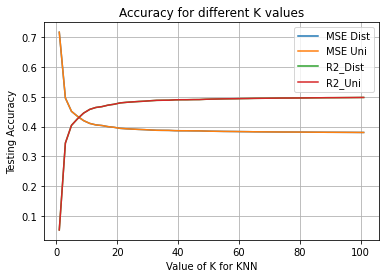

In [51]:
#Plot MSE and R2 Values
k_range = range(1,102,2)
plt.plot(k_range, mse_distance_list)
plt.plot(k_range, mse_uniform_list)
plt.plot(k_range, r2_distance_list)
plt.plot(k_range, r2_uniform_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid('on')
plt.title('Accuracy for different K values')
plt.legend(['MSE Dist', 'MSE Uni', 'R2_Dist', 'R2_Uni'], loc='best')

In [ ]:
#**************** LINEAR REGRESSION ***********************

In [84]:
#Create Linear regression model and train it using training data
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
#Get prediction
predictions = model.predict(X_test)

In [85]:
#Calculate R^2 value and MSE on validation data
print ("R^2 is: \n", model.score(X_test, y_test))
print ('MSE is: \n', mean_squared_error(y_test, predictions))

R^2 is: 
 0.47527315123458536
MSE is: 
 0.39699790996270895


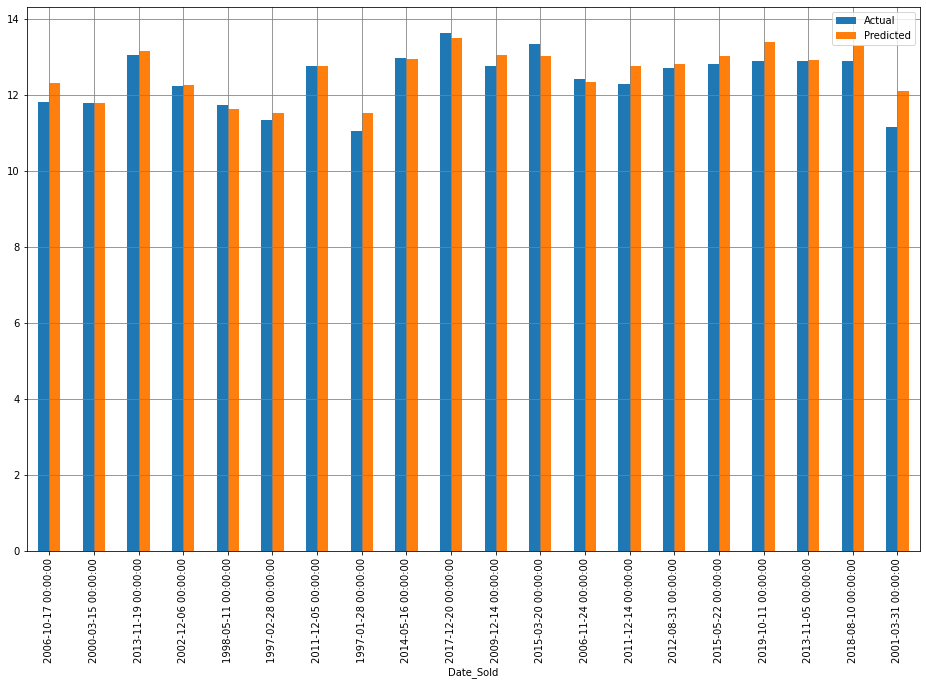

In [86]:
#Plot first 20 predicted prices vs actual prices
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df1 = df.head(20)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(color='gray')
plt.show()

In [87]:
#**************** LINEAR REGRESSION With more columns ***********************

In [88]:
X = london_houses.drop(['Date_Sold','Price','ID', 'Duration', 'PPD'], axis=1)
y = np.log(london_houses.Price)
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [89]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [90]:
print ("R^2 is: \n", model.score(X_test, y_test))
predictions = model.predict(X_test)

R^2 is: 
 0.665573776592231


In [91]:
print ('MSE is: \n', mean_squared_error(y_test, predictions))

MSE is: 
 0.2530202371805089


In [92]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})


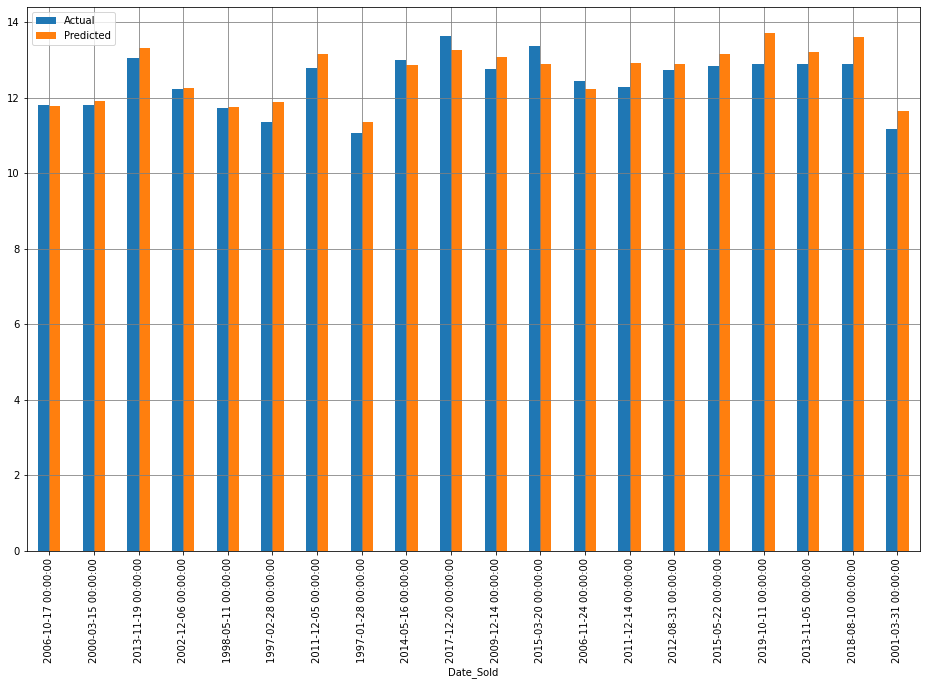

In [35]:
#Plot first 20 predicted prices
df1 = df.head(20)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(color='gray')
plt.show()